# 0. Preliminaries

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

from utils.visualization import show_hm

In [2]:
def report_visualizations_hm(eval_data, save_dir: str, top_k: int = 5, is_bottleneck: bool = False):
	"""
	Create the heatmaps files from the evaluation data.
	
	Parameters:
	eval_data (dict): Dictionary containing evaluation data with 'hm' key for heatmaps.
	num_samples (int): Number of samples to visualize.
	"""

	if os.path.exists(save_dir):
		print(f"Directory {save_dir} already exists. Please remove it before running the script.")
		return

	if is_bottleneck and 'heatmaps_bottleneck' not in eval_data:
		print("No heatmaps found in the evaluation data for bottleneck layer.")
		return

	heatmaps = eval_data['heatmaps'] if not is_bottleneck else eval_data['heatmaps_bottleneck']
	images = eval_data['images_info'] if not is_bottleneck else eval_data['images_info_bottleneck']

	for idx, ((img_name, data), hm_set) in enumerate(zip(images, heatmaps)):
		# Get parent folder name from img_name (assuming img_name is a path)
		parent_folder = os.path.basename(os.path.dirname(img_name))
		save_path = os.path.join(save_dir, parent_folder)
		os.makedirs(save_path, exist_ok=True)

		# Save original image
		print(f"Processing {img_name}...")
		img = mpimg.imread(img_name)
		img_save_path = os.path.join(save_path, f"{os.path.splitext(os.path.basename(img_name))[0]}_orig.png")
		plt.imsave(img_save_path, img)

		# Visualize and save top_k heatmaps if available
		for i in range(min(top_k, hm_set.shape[0])):
			hm_save_path = os.path.join(save_path, f"{os.path.splitext(os.path.basename(img_name))[0]}_hm_{i}.png")
			show_hm(hm_set[i], data, save_path=hm_save_path)

def visualize_sample(list_save_dirs):
	"""
	Visualize 5 first heatmaps from subfolder Adenocarcinoma_ductal for each save
	directory.
	"""
	for save_dir in list_save_dirs:
		# Construct the path to the specific subfolder
		subfolder_path = os.path.join(save_dir, "Adenocarcinoma_ductal")
		if not os.path.exists(subfolder_path):
			print(f"Subfolder {subfolder_path} does not exist.")
			continue

		# Get a list of all heatmap files in the subfolder
		heatmap_files = glob.glob(os.path.join(subfolder_path, "*_hm_*.png"))
		heatmap_files.sort()  # Sort files to ensure consistent ordering

		print("Showing information for:", save_dir)

		# Visualize the first 15 heatmaps in groups of 5 horizontally
		hm_to_show = heatmap_files[:15]
		for i in range(0, len(hm_to_show), 5):
			group = hm_to_show[i:i+5]
			if group:
				fig, axes = plt.subplots(1, len(group), figsize=(4 * len(group), 4))
				if len(group) == 1:
					axes = [axes]
				for ax, hm_file in zip(axes, group):
					hm = mpimg.imread(hm_file)
					ax.imshow(hm, cmap='jet')
					ax.axis('off')
					ax.set_title(f"{os.path.basename(hm_file)}")
				plt.tight_layout()
				plt.show()

# 1. Propuesta

In [3]:
eval_data = torch.load('saved/models/xMI-Efficient-reduced/0708_151820/test_dict.pth')
save_dir = 'tmp/xmi_proposal/'
save_dir_bottleneck = 'tmp/xmi_proposal_bottleneck/'

In [4]:
report_visualizations_hm(eval_data, save_dir)
report_visualizations_hm(eval_data, save_dir_bottleneck, is_bottleneck=True)

Directory tmp/xmi_proposal/ already exists. Please remove it before running the script.
Directory tmp/xmi_proposal_bottleneck/ already exists. Please remove it before running the script.


# 2. Baseline

In [5]:
eval_data_baseline = torch.load('saved/models/fCRP-prostate-reduced/0703_222008/test_dict.pth')
save_dir_baseline = 'tmp/reduced_baseline/'
save_dir_baseline_bottleneck = 'tmp/reduced_baseline_bottleneck/'

In [6]:
report_visualizations_hm(eval_data_baseline, save_dir_baseline)
report_visualizations_hm(eval_data_baseline, save_dir_baseline_bottleneck, is_bottleneck=True)

Directory tmp/reduced_baseline/ already exists. Please remove it before running the script.
No heatmaps found in the evaluation data for bottleneck layer.


# 3. Propuesta (-L2)

In [7]:
eval_data_ml2 = torch.load('saved/models/xMI-Efficient-reduced/0706_113047/test_dict.pth')
save_dir_ml2 = 'tmp/eval_vis_-l2/'
save_dir_ml2_bottleneck = 'tmp/eval_vis_-l2_bottleneck/'

In [8]:
report_visualizations_hm(eval_data_ml2, save_dir_ml2)
report_visualizations_hm(eval_data_ml2, save_dir_ml2_bottleneck, is_bottleneck=True)

Directory tmp/eval_vis_-l2/ already exists. Please remove it before running the script.
Directory tmp/eval_vis_-l2_bottleneck/ already exists. Please remove it before running the script.


# 4. Propuesta (-cov)

In [9]:
eval_data_cov = torch.load('saved/models/xMI-Efficient-reduced/0708_151931/test_dict.pth')
save_dir_cov = 'tmp/eval_-cov/'
save_dir_cov_bottleneck = 'tmp/eval_-cov_bottleneck/'

In [10]:
report_visualizations_hm(eval_data_cov, save_dir_cov)
report_visualizations_hm(eval_data_cov, save_dir_cov_bottleneck, is_bottleneck=True)

Directory tmp/eval_-cov/ already exists. Please remove it before running the script.
Directory tmp/eval_-cov_bottleneck/ already exists. Please remove it before running the script.


# 5. Propuesta (-cov,-L2)

In [11]:
eval_data_mi = torch.load('saved/models/xMI-Efficient-reduced/0705_202504/test_dict.pth')
save_dir_mi = 'tmp/eval_vis_-cov-l2/'
save_dir_mi_bottleneck = 'tmp/eval_vis_-cov-l2_bottleneck/'

In [12]:
report_visualizations_hm(eval_data_mi, save_dir_mi)
report_visualizations_hm(eval_data_mi, save_dir_mi_bottleneck, is_bottleneck=True)

Directory tmp/eval_vis_-cov-l2/ already exists. Please remove it before running the script.
Directory tmp/eval_vis_-cov-l2_bottleneck/ already exists. Please remove it before running the script.


# Z. Análisis conjunto

## Z.1. Visualizaciones

In [13]:
# visualize_sample([
# 	save_dir_baseline,
# 	save_dir_cov,
# 	save_dir,
# 	save_dir_baseline_bottleneck,
# 	save_dir_cov_bottleneck,
# 	save_dir_bottleneck
# ])

## Z.2. Tablas conjuntas

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
vis_idx = 6
save_dir = 'tmp/relevance_vis'
os.makedirs(save_dir, exist_ok=True)

In [16]:
model_data = {
	"baseline": {
		"accuracy": eval_data_baseline['accuracy'],
		"rmse": eval_data_baseline['mean_euclidean_distance'],
		"kl_divergence": eval_data_baseline['kl_divergence'][vis_idx]
	},
	"-l2,-cov": {
		"accuracy": eval_data_mi['accuracy'],
		"rmse": eval_data_mi['mean_euclidean_distance'],
		"kl_divergence": eval_data_mi['kl_divergence'][vis_idx],
		# "kl_divergence_bottleneck": eval_data_mi['kl_divergence_bottleneck'][vis_idx]
	},
	"-l2": {
		"accuracy": eval_data_ml2['accuracy'],
		"rmse": eval_data_ml2['mean_euclidean_distance'],
		"kl_divergence": eval_data_ml2['kl_divergence'][vis_idx],
		"kl_divergence_bottleneck": eval_data_ml2['kl_divergence_bottleneck'][vis_idx]
	},
	"-cov": {
		"accuracy": eval_data_cov['accuracy'],
		"rmse": eval_data_cov['mean_euclidean_distance'],
		"kl_divergence": eval_data_cov['kl_divergence'][vis_idx],
		"kl_divergence_bottleneck": eval_data_cov['kl_divergence_bottleneck'][vis_idx]
	},
	"propuesta": {
		"accuracy": eval_data['accuracy'],
		"rmse": eval_data['mean_euclidean_distance'],
		"kl_divergence": eval_data['kl_divergence'][vis_idx],
		"kl_divergence_bottleneck": eval_data['kl_divergence_bottleneck'][vis_idx]
	}
}

pd.DataFrame(model_data).T

,accuracy,rmse,kl_divergence,kl_divergence_bottleneck
baseline,0.747904,457.340820,0.000076,NaN
"-l2,-cov",0.761203,429.504517,0.000080,NaN
-l2,0.752530,457.904175,0.000095,0.000071
-cov,0.760335,427.535034,0.000080,0.000060
propuesta,0.753686,445.750214,0.000087,0.000071


In [17]:
def plot_top_k_relevances(eval_data_dict, vis_idx, k = 8, is_bottleneck=False, model_name=''):
	field_name = 'relevances_bottleneck' if is_bottleneck else 'relevances'
	relevances = eval_data[field_name][vis_idx]
	if isinstance(relevances, torch.Tensor):
		relevances = relevances.detach().cpu().numpy().flatten()

	top_indices = relevances.argsort()[-k:][::-1]
	top_values = relevances[top_indices]

	plt.figure(figsize=(8, 4))
	plt.bar(range(k), top_values)
	plt.xticks(range(k), [f'C{i}' for i in top_indices])
	plt.ylabel('Relevance')
	plt.title(f'{model_name}.Top {k} Feature Relevances ({"Bottleneck" if is_bottleneck else "Conv Layer"})')
	plt.show()

Baseline


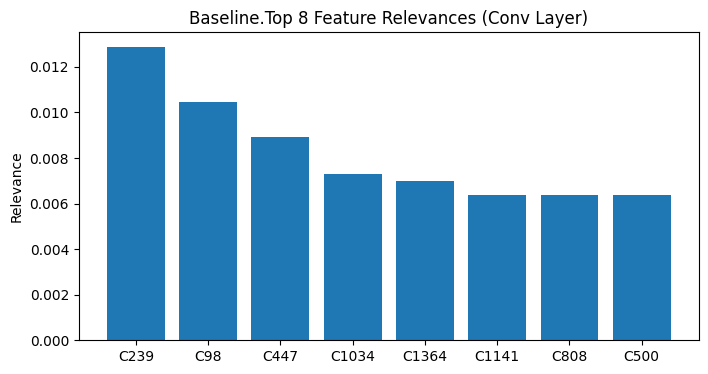

Proposal (Conv Layer)


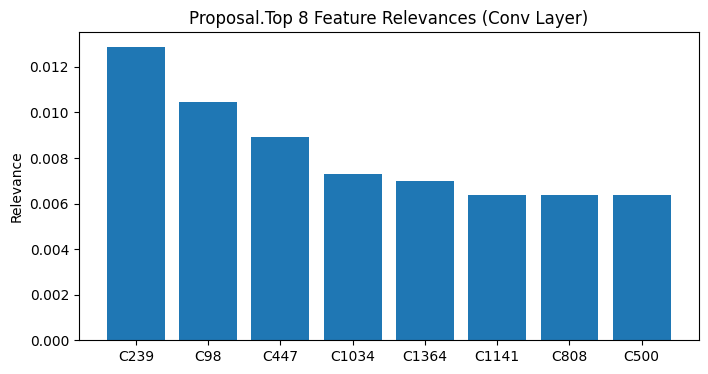

Proposal (bottleneck layer)


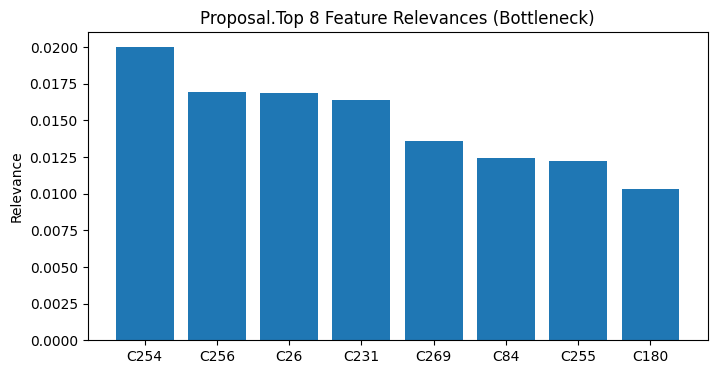

In [18]:
print("Baseline")
plot_top_k_relevances(eval_data_baseline, vis_idx, k=8, model_name='Baseline')
print("Proposal (Conv Layer)")
plot_top_k_relevances(eval_data, vis_idx, k=8, model_name='Proposal')
print("Proposal (bottleneck layer)")
plot_top_k_relevances(eval_data, vis_idx, k=8, is_bottleneck=True, model_name='Proposal')

Plot saved to tmp/relevance_vis/relevances_Baseline_-(cov,l2)_-cov_-L2_Proposal.pdf


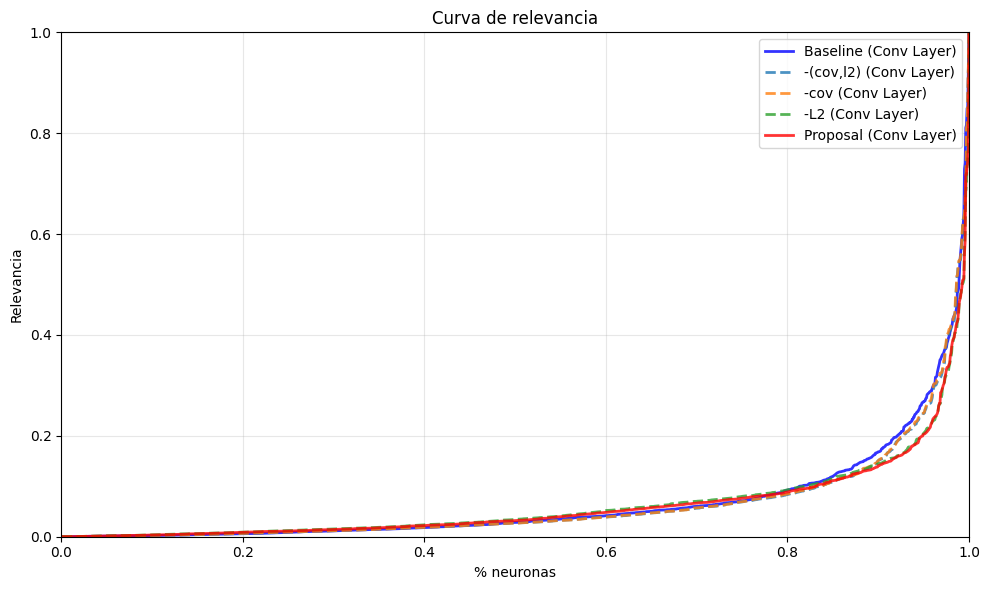

,Model (Layer),AUC,Mean,Std,Median,95th Percentile
0,Baseline (Conv Layer),0.065899,0.065899,0.107773,0.028392,0.267899
1,"-(cov,l2) (Conv Layer)",0.062294,0.062294,0.103946,0.027179,0.244717
2,-cov (Conv Layer),0.062850,0.062850,0.105063,0.026927,0.245691
3,-L2 (Conv Layer),0.063384,0.063384,0.090206,0.034429,0.204971
4,Proposal (Conv Layer),0.061658,0.061658,0.090370,0.032136,0.203144


Plot saved to tmp/relevance_vis/relevances_-(cov,l2)_-cov_-L2_Proposal_bottleneck.pdf


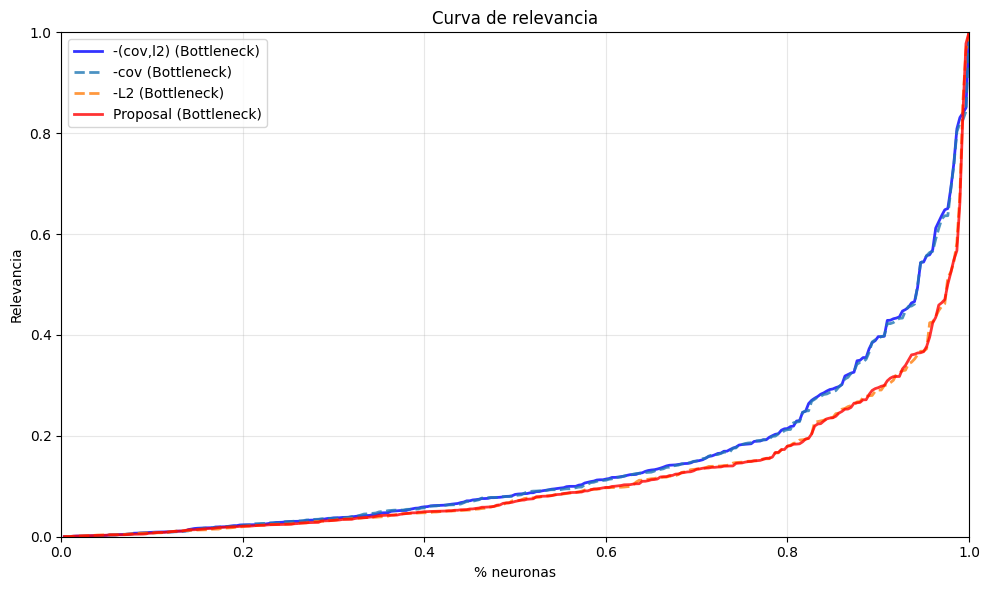

,Model (Layer),AUC,Mean,Std,Median,95th Percentile
0,"-(cov,l2) (Bottleneck)",0.146227,0.146227,0.176624,0.084221,0.545273
1,-cov (Bottleneck),0.145048,0.145048,0.174998,0.082024,0.547715
2,-L2 (Bottleneck),0.118275,0.118275,0.144679,0.071641,0.368115
3,Proposal (Bottleneck),0.118158,0.118158,0.144253,0.070643,0.367386


In [19]:
def plot_cdf_relevances_multi(named_eval_data, idx=0, save_dir=None):
    """
    Plot CDF of normalized relevances for multiple models.
    named_eval_data: list of tuples (name, eval_data, is_bottleneck)
    idx: index of sample to use
    save_dir: directory to save the plot (optional)
    """
    def get_flattened_relevances(eval_data, key='relevances', idx=0):
        relevances = eval_data[key][idx]
        if isinstance(relevances, torch.Tensor):
            relevances = relevances.detach().cpu().numpy().flatten()
        return relevances

    def normalize(values):
        return np.abs(values) / np.linalg.norm(values, ord=np.inf)

    def get_auc(norm_values):
        return np.mean(norm_values)

    def get_sorted_and_cdf(norm_values):
        sorted_vals = np.sort(norm_values)
        cdf_vals = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
        return sorted_vals, cdf_vals

    fig, ax = plt.subplots(figsize=(10, 6))
    stats = []

    for i, (name, eval_data, is_bottleneck) in enumerate(named_eval_data):
        key = 'relevances_bottleneck' if is_bottleneck else 'relevances'
        layer_label = 'Bottleneck' if is_bottleneck else 'Conv Layer'
        label = f"{name} ({layer_label})"
        relevances = get_flattened_relevances(eval_data, key=key, idx=idx)
        norm_vals = normalize(relevances)
        sorted_vals, cdf_vals = get_sorted_and_cdf(norm_vals)
        auc = get_auc(norm_vals)
        if i == 0:
            ax.plot(cdf_vals, sorted_vals, label=label, color='blue', linewidth=2, alpha=0.8)
        elif i == len(named_eval_data) - 1:
            ax.plot(cdf_vals, sorted_vals, label=label, color='red', linewidth=2, alpha=0.8)
        else:
            ax.plot(cdf_vals, sorted_vals, label=label, linewidth=2, alpha=0.8, linestyle='dashed')
        stats.append((label, norm_vals, sorted_vals, cdf_vals, auc))

    ax.set_xlabel('% neuronas')
    ax.set_ylabel('Relevancia')
    ax.set_title('Curva de relevancia')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.tight_layout()
    
    # Save plot if save_dir is provided
    if save_dir:
        # Create filename from model names
        model_names = [name for name, _, _ in named_eval_data]
        filename = f"relevances_{'_'.join(model_names)}"
        if is_bottleneck:
            filename += "_bottleneck"
        filename += ".pdf"
        filepath = os.path.join(save_dir, filename)
        plt.savefig(filepath, format='pdf', bbox_inches='tight')
        print(f"Plot saved to {filepath}")
    
    plt.show()

    # Collect stats into a DataFrame
    stats_dict = {
        "Model (Layer)": [],
        "AUC": [],
        "Mean": [],
        "Std": [],
        "Median": [],
        "95th Percentile": []
    }
    for label, norm_vals, _, _, auc in stats:
        stats_dict["Model (Layer)"].append(label)
        stats_dict["AUC"].append(auc)
        stats_dict["Mean"].append(norm_vals.mean())
        stats_dict["Std"].append(norm_vals.std())
        stats_dict["Median"].append(np.median(norm_vals))
        stats_dict["95th Percentile"].append(np.percentile(norm_vals, 95))
    stats_df = pd.DataFrame(stats_dict)
    display(stats_df)

named_eval_data = [
    ('Baseline', eval_data_baseline, False),
    ('-(cov,l2)', eval_data_mi, False),
    ('-cov', eval_data_cov, False),
    ('-L2', eval_data_ml2, False),
    ('Proposal', eval_data, False)
]

named_eval_data_bottleneck = [
    # ('Baseline', eval_data_baseline, False),
    ('-(cov,l2)', eval_data_mi, True),
    ('-cov', eval_data_cov, True),
    ('-L2', eval_data_ml2, True),
    ('Proposal', eval_data, True)
]

# idx = 7
plot_cdf_relevances_multi(named_eval_data, idx=7, save_dir=save_dir)
# idx = 16 (+), 24, 28 (good)
plot_cdf_relevances_multi(named_eval_data_bottleneck, idx=28, save_dir=save_dir)


Plot saved to tmp/relevance_vis/relevances_mean_Baseline_-(cov,l2)_-cov_-L2_Proposal.pdf


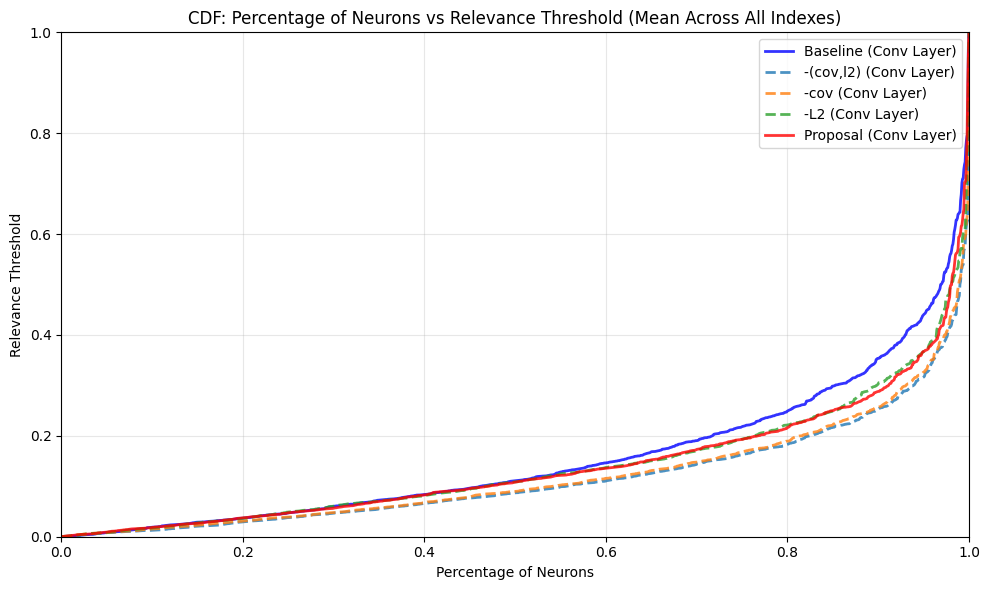


Relevance Statistics (Mean Across All Indexes):


,Model (Layer),Mean,Std,Median,95th Percentile
0,Baseline (Conv Layer),0.154563,0.144350,0.110980,0.440225
1,"-(cov,l2) (Conv Layer)",0.116004,0.107755,0.087177,0.316521
2,-cov (Conv Layer),0.119950,0.110587,0.089906,0.326139
3,-L2 (Conv Layer),0.138759,0.122877,0.108748,0.367038
4,Proposal (Conv Layer),0.138138,0.124303,0.108425,0.367239


Plot saved to tmp/relevance_vis/relevances_mean_-(cov,l2)_-cov_-L2_Proposal.pdf


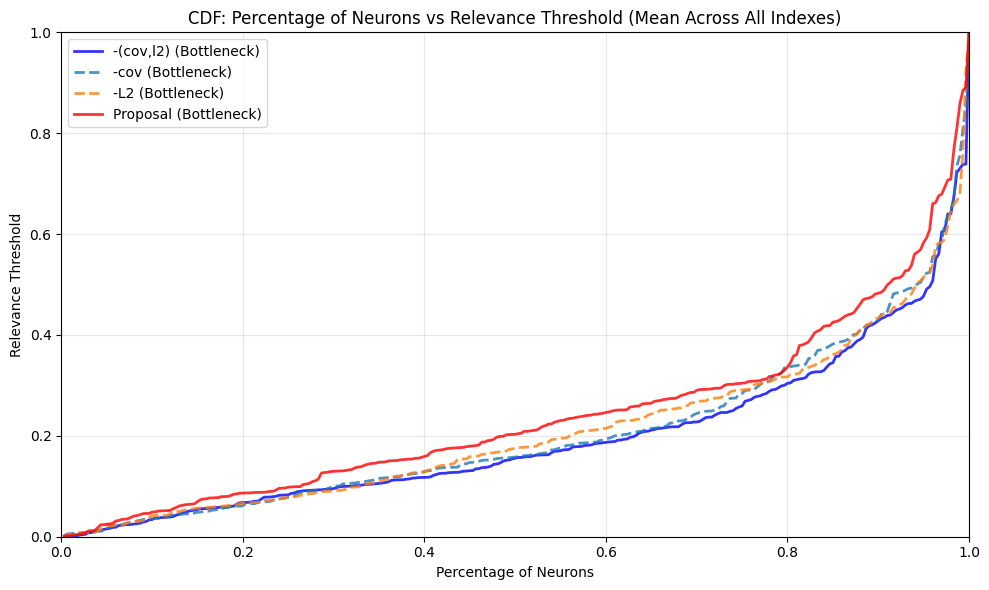


Relevance Statistics (Mean Across All Indexes):


,Model (Layer),Mean,Std,Median,95th Percentile
0,"-(cov,l2) (Bottleneck)",0.194655,0.159574,0.156281,0.477804
1,-cov (Bottleneck),0.204238,0.168052,0.158051,0.515028
2,-L2 (Bottleneck),0.208377,0.164408,0.175665,0.514935
3,Proposal (Bottleneck),0.238504,0.180377,0.203610,0.583847


In [20]:
def plot_cdf_relevances_multi_mean(named_eval_data, save_dir=None):
	"""
	Plot CDF of normalized relevances for multiple models, using the mean across all indexes.
	named_eval_data: list of tuples (name, eval_data, is_bottleneck)
	save_dir: directory to save the plot (optional)
	"""
	def get_flattened_relevances_all(eval_data, key='relevances'):
		relevances_list = eval_data[key]
		all_relevances = []
		for rel in relevances_list:
			if isinstance(rel, torch.Tensor):
				rel = rel.detach().cpu().numpy().flatten()
			all_relevances.append(rel)
		all_relevances = np.stack(all_relevances)
		mean_relevances = np.mean(all_relevances, axis=0)
		return mean_relevances

	def normalize(values):
		return np.abs(values) / np.linalg.norm(values, ord=np.inf)

	def get_sorted_and_cdf(norm_values):
		sorted_vals = np.sort(norm_values)
		cdf_vals = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
		return sorted_vals, cdf_vals

	fig, ax = plt.subplots(figsize=(10, 6))
	stats = []

	for i, (name, eval_data, is_bottleneck) in enumerate(named_eval_data):
		key = 'relevances_bottleneck' if is_bottleneck else 'relevances'
		layer_label = 'Bottleneck' if is_bottleneck else 'Conv Layer'
		label = f"{name} ({layer_label})"
		mean_relevances = get_flattened_relevances_all(eval_data, key=key)
		norm_vals = normalize(mean_relevances)
		sorted_vals, cdf_vals = get_sorted_and_cdf(norm_vals)
		if i == 0:
			ax.plot(cdf_vals, sorted_vals, label=label, color='blue', linewidth=2, alpha=0.8)
		elif i == len(named_eval_data) - 1:
			ax.plot(cdf_vals, sorted_vals, label=label, color='red', linewidth=2, alpha=0.8)
		else:
			ax.plot(cdf_vals, sorted_vals, label=label, linewidth=2, alpha=0.8, linestyle='dashed')
		stats.append((label, norm_vals, sorted_vals, cdf_vals))

	ax.set_xlabel('Percentage of Neurons')
	ax.set_ylabel('Relevance Threshold')
	ax.set_title('CDF: Percentage of Neurons vs Relevance Threshold (Mean Across All Indexes)')
	ax.legend()
	ax.grid(True, alpha=0.3)
	ax.set_xlim(0, 1)
	ax.set_ylim(0, 1)
	plt.tight_layout()
	
	# Save plot if save_dir is provided
	if save_dir:
		# Create filename from model names
		model_names = [name for name, _, _ in named_eval_data]
		filename = f"relevances_mean_{'_'.join(model_names)}.pdf"
		filepath = os.path.join(save_dir, filename)
		plt.savefig(filepath, format='pdf', bbox_inches='tight')
		print(f"Plot saved to {filepath}")
	
	plt.show()

	print("\nRelevance Statistics (Mean Across All Indexes):")

	stats_dict = {
		"Model (Layer)": [],
		"Mean": [],
		"Std": [],
		"Median": [],
		"95th Percentile": []
	}

	for label, norm_vals, _, _ in stats:
		stats_dict["Model (Layer)"].append(label)
		stats_dict["Mean"].append(norm_vals.mean())
		stats_dict["Std"].append(norm_vals.std())
		stats_dict["Median"].append(np.median(norm_vals))
		stats_dict["95th Percentile"].append(np.percentile(norm_vals, 95))

	stats_df = pd.DataFrame(stats_dict)
	display(stats_df)

	# print("Key Interpretations:")
	# for p in [0.5, 0.75, 0.9, 0.95]:
	# 	for label, norm_vals, _, _ in stats:
	# 		val = np.percentile(norm_vals, p * 100)
	# 		print(f"  {p*100:.0f}% of neurons have relevance < {val:.3f} ({label})")
	# 	print()

# Example usage:
plot_cdf_relevances_multi_mean(named_eval_data, save_dir=save_dir)
plot_cdf_relevances_multi_mean(named_eval_data_bottleneck, save_dir=save_dir)


In [21]:
# def plot_cdf_relevances_inverted(eval_data_baseline, eval_data, eval_data_cov, model_names=['Baseline', 'Proposal', '-cov']):
# 	"""
# 	Plot CDF of normalized relevances for multiple models, with axes inverted.
# 	Point (x,y) represents: y percentage of neurons have relevance lower than x
# 	"""
# 	# Helper to extract and normalize relevances
# 	def get_norm_relevances(eval_data, field='relevances'):
# 		relevances = eval_data[field][0]
# 		if isinstance(relevances, torch.Tensor):
# 			relevances = relevances.detach().cpu().numpy().flatten()
		
# 		relevances = np.abs(relevances)
# 		# return relevances / np.linalg.norm(relevances, ord=np.inf)
# 		# Min-max normalization to (0,1)
# 		return (relevances - relevances.min()) / (relevances.max() - relevances.min())

# 	norm_baseline = get_norm_relevances(eval_data_baseline, 'relevances')
# 	norm_proposal = get_norm_relevances(eval_data, 'relevances')
# 	norm_cov = get_norm_relevances(eval_data_cov, 'relevances_bottleneck')

# 	# Sort values for CDF
# 	sorted_baseline = np.sort(norm_baseline)
# 	sorted_proposal = np.sort(norm_proposal)
# 	sorted_cov = np.sort(norm_cov)
# 	cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline)
# 	cdf_proposal = np.arange(1, len(sorted_proposal) + 1) / len(sorted_proposal)
# 	cdf_cov = np.arange(1, len(sorted_cov) + 1) / len(sorted_cov)

# 	fig, ax = plt.subplots(figsize=(10, 6))
# 	ax.plot(sorted_baseline, cdf_baseline, label=f'{model_names[0]} (Conv Layer)', color='blue', linewidth=2, alpha=0.8)
# 	ax.plot(sorted_proposal, cdf_proposal, label=f'{model_names[1]} (Bottleneck Layer)', color='green', linewidth=2, alpha=0.8)
# 	ax.plot(sorted_cov, cdf_cov, label=f'{model_names[1]} (-cov Bottleneck)', color='red', linewidth=2, alpha=0.8, linestyle='dashed')

# 	# Customize the plot
# 	ax.set_xlabel('Relevance Threshold')
# 	ax.set_ylabel('Percentage of Neurons')
# 	ax.set_title('CDF: Relevance Threshold vs Percentage of Neurons')
# 	ax.legend()
# 	ax.grid(True, alpha=0.3)
# 	ax.set_xlim(0, 1)
# 	ax.set_ylim(0, 1)
# 	plt.tight_layout()
# 	plt.show()

# # Plot the CDF with axes inverted
# plot_cdf_relevances_inverted(eval_data_baseline, eval_data, eval_data_cov, model_names=['Baseline', 'Proposal'])

In [22]:
# model_names=['Baseline', 'Proposal', '-cov']

# # Helper to extract and normalize relevances
# def get_norm_relevances(eval_data, field='relevances'):
# 	relevances = eval_data[field][0]
# 	if isinstance(relevances, torch.Tensor):
# 		relevances = relevances.detach().cpu().numpy().flatten()
	
# 	relevances = np.abs(relevances)	
# 	# Min-max normalization to (0,1)
# 	return (relevances - relevances.min()) / (relevances.max() - relevances.min())

# norm_baseline = get_norm_relevances(eval_data_baseline, 'relevances')
# norm_proposal = get_norm_relevances(eval_data, 'relevances')
# norm_cov = get_norm_relevances(eval_data_cov, 'relevances')

# # Sort values for CDF
# sorted_baseline = np.sort(norm_baseline)
# sorted_proposal = np.sort(norm_proposal)
# sorted_cov = np.sort(norm_cov)
# cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline)
# cdf_proposal = np.arange(1, len(sorted_proposal) + 1) / len(sorted_proposal)
# cdf_cov = np.arange(1, len(sorted_cov) + 1) / len(sorted_cov)

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(sorted_baseline, cdf_baseline, label=f'{model_names[0]} (Conv Layer)', color='blue', linewidth=2, alpha=0.8)
# ax.plot(sorted_proposal, cdf_proposal, label=f'{model_names[1]} (Bottleneck Layer)', color='green', linewidth=2, alpha=0.8)
# ax.plot(sorted_cov, cdf_cov, label=f'{model_names[1]} (-cov Bottleneck)', color='red', linewidth=2, alpha=0.8, linestyle='dashed')

# # Customize the plot
# ax.set_xlabel('Relevance Threshold')
# ax.set_ylabel('Percentage of Neurons')
# ax.set_title('CDF: Relevance Threshold vs Percentage of Neurons')
# ax.legend()
# ax.grid(True, alpha=0.2)
# ax.set_xlim(-1, 1)
# ax.set_ylim(0, 1)
# plt.tight_layout()
# plt.show()


In [23]:
# !zip -r tmp/figures.zip {save_dir} {save_dir_bottleneck} {save_dir_baseline} {save_dir_baseline_bottleneck} {save_dir_ml2} {save_dir_ml2_bottleneck} {save_dir_cov} {save_dir_cov_bottleneck} {save_dir_mi} {save_dir_mi_bottleneck}